Loading and Preprocessing
---
Read in idling data from Corey first, perform PCA and t-SNE

In [2]:
# load files and packages
from fcc_utils import *
from fcc_DRs import *

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [85]:
# reload functions when editing file
import sys
del sys.modules['fcc_DRs']
from fcc_DRs import *

In [75]:
# reload functions when editing file
import sys
del sys.modules['fcc_utils']
from fcc_utils import *

In [86]:
# treated BRAF melanoma cell line
treated = RNA_counts.from_file(datafile='idling/treated_raw.csv.gz', cells_axis=1, barcodefile='idling/Treated_LineageBC_cellBC.csv')

In [87]:
# get top most abundant barcodes
treated.top_barcodes(ranks=[1,2,3,'CTGAGTCACTCACTGAGTGT'])

['CTGAGAGTGAGTCTGTCAGT',
 'CTGAGTCAGAGTGACACACT',
 'CTGACAGACACTCTCAGTCT',
 'CTGAGTCACTCACTGAGTGT']

In [88]:
%%time
# perform 100-component PCA to prime tSNE
treated_PCA = fcc_PCA(matrix=treated.arcsinh_norm(), n_components=100, barcodes=treated.barcodes)

CPU times: user 16.3 s, sys: 2.82 s, total: 19.1 s
Wall time: 13.3 s


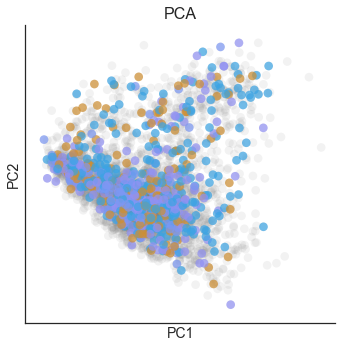

In [89]:
treated_PCA.plot_barcodes(ranks=[1,2,3,'CTGAGTCACTCACTGAGTGT'])

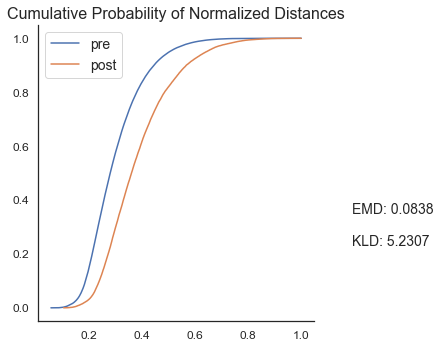

CPU times: user 6.81 s, sys: 1.31 s, total: 8.12 s
Wall time: 7.86 s


In [26]:
%time EMD, KLD = compare_distance_dist(pre=treated_PCA.distance_matrix(), post=treated_PCA.distance_matrix(ranks=[1]))

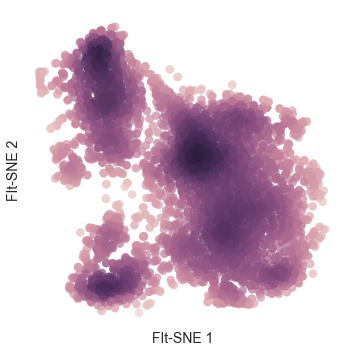

CPU times: user 1.18 s, sys: 94.3 ms, total: 1.27 s
Wall time: 21.9 s


In [10]:
%%time
# run FIt-SNE on PCA output
treated_tSNE = fcc_FItSNE(matrix=treated_PCA.results, perplexity=30, barcodes=treated_PCA.barcodes)
treated_tSNE.plot()

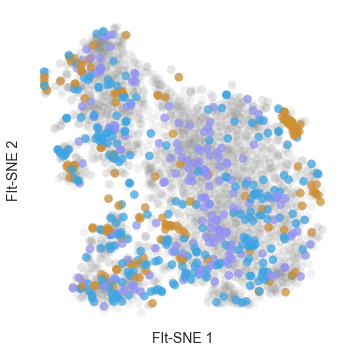

In [11]:
treated_tSNE.plot_barcodes(ranks=[1,2,3])

---
Now look at untreated control cell population

In [90]:
%time untreated = RNA_counts.from_file(datafile='untreated/untreated_raw.csv.gz', cells_axis=1, barcodefile='untreated/Untreated_LineageBC_cellBC.csv')

CPU times: user 14.7 s, sys: 2.4 s, total: 17.1 s
Wall time: 17.5 s


In [91]:
%%time
untreated_PCA = fcc_PCA(matrix=untreated.arcsinh_norm(), n_components=100, barcodes=untreated.barcodes)

CPU times: user 13.3 s, sys: 1.95 s, total: 15.3 s
Wall time: 10 s


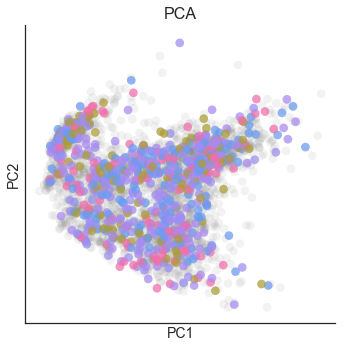

In [95]:
untreated_PCA.plot_barcodes(ranks = untreated_PCA.top_barcodes([1,2,3,4,5]))

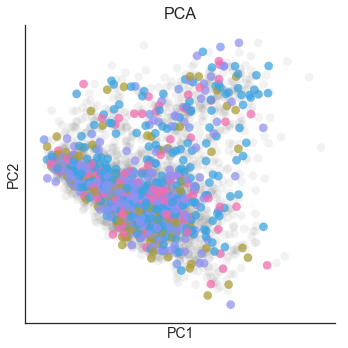

In [94]:
treated_PCA.plot_barcodes(ranks = untreated_PCA.top_barcodes([1,2,3,4,5]))

---
Distance calculations

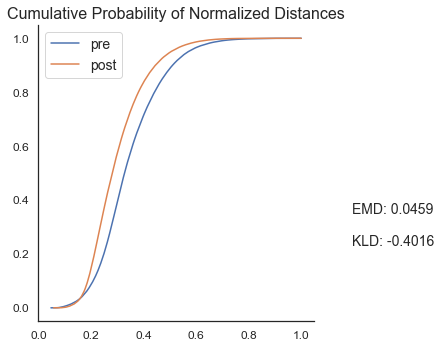

CPU times: user 11 s, sys: 2.34 s, total: 13.3 s
Wall time: 13.2 s


(0.0459445570787947, -0.40157404731196955)

In [28]:
# untreated cells vs treated cells as baseline
%time compare_distance_dist(pre=untreated_PCA.distance_matrix(ranks='all'), post=treated_PCA.distance_matrix(ranks='all'))

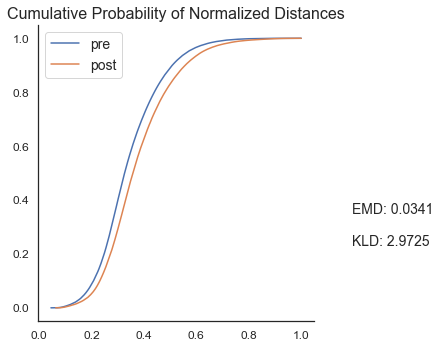

CPU times: user 5 s, sys: 1.05 s, total: 6.05 s
Wall time: 6.02 s


(0.034063713237128646, 2.972543041647903)

In [96]:
# untreated cells, top abundant barcode vs population
%time compare_distance_dist(pre=untreated_PCA.distance_matrix(ranks='all'), post=untreated_PCA.distance_matrix(ranks=untreated_PCA.top_barcodes([1,2,3,4,5])))

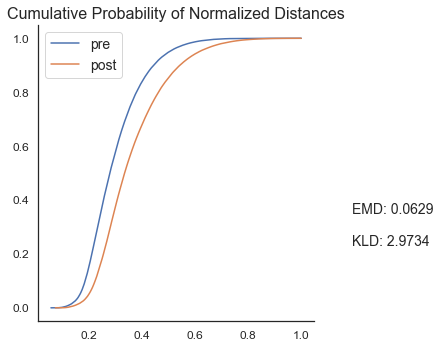

CPU times: user 7.72 s, sys: 1.53 s, total: 9.25 s
Wall time: 9.08 s


(0.0629228722154823, 2.9734366675013053)

In [97]:
# idling cells, top abundant barcode vs population
%time compare_distance_dist(pre=treated_PCA.distance_matrix(ranks='all'), post=treated_PCA.distance_matrix(ranks=untreated_PCA.top_barcodes([1,2,3,4,5])))